# 1. Simulation of the Asset Exchange Model

In [1]:
## (a) Simulation program
from random import random, sample, seed
import numpy as np
import matplotlib.pyplot as plt

seed(5003)

ex = -0.7 # Exponent of saving factor
N = 1500 # Number of Agents in each simulation
n = 5000 # Number of iterations in each simulation
nsample = 6 # Number of simulations

wealth = np.array([]) # master matrix containing wealth of all agents after simulation
for i in range(nsample):
    savings = np.random.random(N)**(1/(1+ex)) # random saving factor of agents within the simulation
    m = np.ones(N) # initial wealth of agents within the simulation
    for j in range(n):
        pair = sample(range(N), N) # pairing of agents
        for k in range(0, N, 2):
            p1 = pair[k] # agent i
            p2 = pair[k+1] # agent j
            trade = random() # random trading factor
            m[p1], m[p2] = savings[p1]*m[p1]+trade*((1-savings[p1])*m[p1]+(1-savings[p2])*m[p2]), savings[p2]*m[p2]+(1-trade)*((1-savings[p1])*m[p1]+(1-savings[p2])*m[p2])
    wealth = np.concatenate((wealth, m))


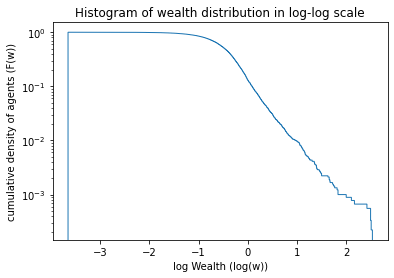

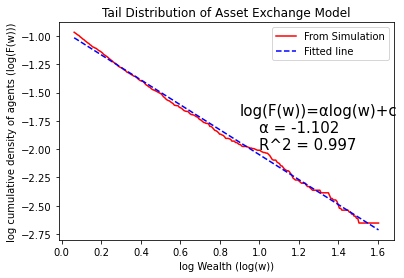

From the fitted line, the tail distribution obeys the power law with exponent = -1.102
## (c) when we compare agents’ wealth with those agents whose wealth is doubled, the average number of agents will be reduced by a factor of x = 2^α = 0.466


In [2]:
## (b) Construct histogram of the wealth distribution in log-log scale
count, bins, bar = plt.hist(np.log10(wealth), density=1, cumulative=-1, histtype='step', log=True, bins=1000)
plt.title('Histogram of wealth distribution in log-log scale')
plt.xlabel('log Wealth (log(w))')
plt.ylabel('cumulative density of agents (F(w))')  # F(w) = cumulative density from the higher end

# Check if the tail distribution obeys the power law
from scipy.optimize import curve_fit

def linear_function(x, m, b):
    return m*x+b

m = 1
b = 0
x1 = 600
x2 = 850
bins = np.array([(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)])
m_fit, b_fit = curve_fit(linear_function, bins[x1:x2], np.log10(count[x1:x2]), p0=[m, b])[0]

# Calculate R^2
residuals = np.log10(count[x1:x2]) - linear_function(bins[x1:x2], m_fit, b_fit)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((np.log10(count[x1:x2])-np.mean(np.log10(count[x1:x2])))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Plotting
plt.figure()
plt.plot(bins[x1:x2], np.log10(count[x1:x2]), 'r-', label='From Simulation')
plt.plot(bins[x1:x2], linear_function(bins[x1:x2], m_fit, b_fit), 'b--', label='Fitted line')
plt.xlabel('log Wealth (log(w))')
plt.ylabel('log cumulative density of agents (log(F(w)))')
plt.legend()
plt.title('Tail Distribution of Asset Exchange Model')
plt.text(0.9,-1.7,'log(F(w))=\u03B1log(w)+c', fontsize=15)
plt.text(1,-1.85,f'\u03B1 = {m_fit:.3f}', fontsize=15)
plt.text(1,-2,f'R^2 = {r_squared:.3f}', fontsize=15)
plt.show()
print(f'From the fitted line, the tail distribution obeys the power law with exponent = {m_fit:.3f}')
print(f'## (c) when we compare agents’ wealth with those agents whose wealth is doubled, the average number of agents will be reduced by a factor of x = 2^\u03B1 = {2**m_fit:.3f}')

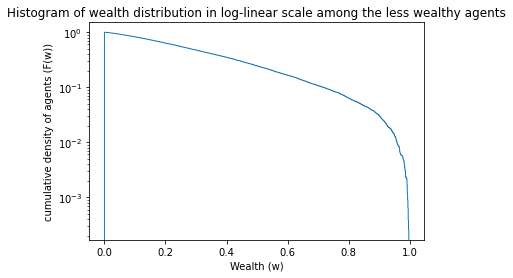

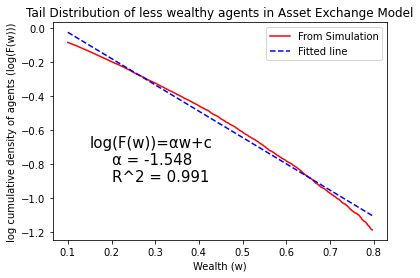

From the fitted line, the tail distribution of less wealth agents obeys the exponential law with function 10^(-1.548w)
## (e) When we compare agents’ wealth with those agents whose wealth is higher by 0.5 times the average wealth of the market, the average number of agents will be reduced by a factor of y = 10^(0.5α) = 0.168


In [3]:
## (d) Construct histogram of less wealthy agents
wealth_less = wealth[np.where(wealth<1)]
c1, b1, bar1 = plt.hist(wealth_less, density=1, cumulative=-1, histtype='step', log=True, bins=1000)
plt.title('Histogram of wealth distribution in log-linear scale among the less wealthy agents')
plt.xlabel('Wealth (w)')
plt.ylabel('cumulative density of agents (F(w))')  # F(w) = cumulative density from the higher end

# Check if the tail distribution of less wealthy agents obeys the exponeential law
m = 1
b = 0
x1 = 100
x2 = 800
b1s = np.array([(b1[i]+b1[i+1])/2 for i in range(len(b1)-1)])
m1_fit, b1_fit = curve_fit(linear_function, b1[x1:x2], np.log10(c1[x1:x2]), p0=[m,b])[0]

# Calculate R^2
residuals = np.log10(c1[x1:x2]) - linear_function(b1[x1:x2], m1_fit, b1_fit)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((np.log10(c1[x1:x2])-np.mean(np.log10(c1[x1:x2])))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Plotting
plt.figure()
plt.plot(b1[x1:x2], np.log10(c1[x1:x2]), 'r-', label='From Simulation')
plt.plot(b1[x1:x2], linear_function(b1[x1:x2], m1_fit, b1_fit), 'b--', label='Fitted line')
plt.xlabel('Wealth (w)')
plt.ylabel('log cumulative density of agents (log(F(w)))')
plt.legend()
plt.title('Tail Distribution of less wealthy agents in Asset Exchange Model')
plt.text(0.15,-0.7,'log(F(w))=\u03B1w+c', fontsize=15)
plt.text(0.2,-0.8,f'\u03B1 = {m1_fit:.3f}', fontsize=15)
plt.text(0.2,-0.9,f'R^2 = {r_squared:.3f}', fontsize=15)
plt.show()
print(f'From the fitted line, the tail distribution of less wealth agents obeys the exponential law with function 10^({m1_fit:.3f}w)')
print(f'## (e) When we compare agents’ wealth with those agents whose wealth is higher by 0.5 times the average wealth of the market, the average number of agents will be reduced by a factor of y = 10^(0.5\u03B1) = {10**(0.5*m1_fit):.3f}')

In [4]:
## (f) Calculate % of wealth owned by the wealthiest 20% of the agents
from math import floor

sorted_wealth = np.sort(wealth)[::-1] # array of wealth in descending order
nagents = N*nsample # total number of agents
wealthiest20 = sum(sorted_wealth[:floor(nagents*0.2)])
print(f'Percentage of wealth owned by the wealthiest 20% of the agents = {wealthiest20/nagents*100:.1f}%')

Percentage of wealth owned by the wealthiest 20% of the agents = 76.6%


# 2. Simulation of the Minority Game

## Simulation program

In [5]:
import numpy as np
from numpy.random import randint
from random import seed, choice
import matplotlib.pyplot as plt

seed(5003)

def minority(m=3, N=101, ns=2, iterations=1000):
    states = 2**m # number of states
    sequence = 2*randint(0, 2, N*ns*states) - 1
    darray = sequence.reshape((N, ns, states)) # array of strategies
    varray = np.zeros((N, ns)) # array of virtual scores
    rarray = np.zeros((N, iterations+1)) # array of real scores
    active = 0 # initialize input state at t=0
    buyers = [] # array of number of buyers

    def update_scores(d, v, r, jchoice, actions, active):
        r1 = r.copy()
        score = sum(actions)/N
        for i in range(N):
            for j in range(ns):
                v[i,j] -= d[i,j,active]*score
            r1[i] = r[i] - d[i,jchoice[i],active]*score
        return v, r1

    def update_state(current, new):
        return (2 * current + new) % states

    for k in range(1, iterations+1):
        actions = [] # array of agents' action in each iteration
        jchoice = [] # array of strategy chosen in each iteration
        for i in range(N):
            max_v = varray[i,0]
            max_vi = [0]
            for j in range(1,ns):
                if varray[i,j] > max_v:
                    max_v = varray[i,j]
                    max_vi = [j]
                elif varray[i,j] == max_v:
                    max_vi.append(j)
            if len(max_vi)==1:
                jchoice.append(max_vi[0])
            else:
                jchoice.append(choice(max_vi))
            actions.append(darray[i,jchoice[-1],active])
        buyers.append(sum([n==1 for n in actions]))
        if buyers[-1] > (N-1)/2:
            winning = 1
        else:
            winning = 0
        varray, rarray[:,k] = update_scores(darray, varray, rarray[:,k-1], jchoice, actions, active)
        active = update_state(active, winning)
              
    return buyers, rarray



## Outputs for 1 sample with N=101:

## Plotting number of buyers vs time

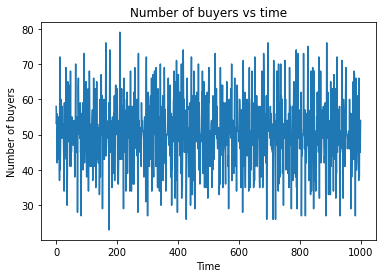

In [6]:
buyers, rarray = minority()
plt.plot(buyers)
plt.title('Number of buyers vs time')
plt.xlabel('Time')
plt.ylabel('Number of buyers')
plt.show()

## Plotting real scores of the 3 best and 3 worst agents

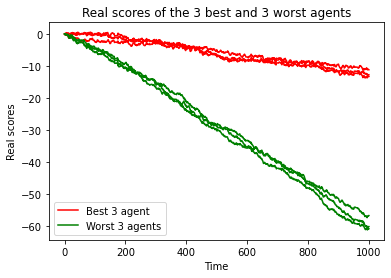

In [7]:
best3 = rarray[:,-1].argsort()[-3:][::-1]
worst3 = rarray[:,-1].argsort()[:3]
plt.plot(rarray[best3[0],:], c='r', label='Best 3 agent')
plt.plot(rarray[best3[1],:], c='r')
plt.plot(rarray[best3[2],:], c='r')
plt.plot(rarray[worst3[0],:], c='g', label='Worst 3 agents')
plt.plot(rarray[worst3[1],:], c='g')
plt.plot(rarray[worst3[2],:], c='g')
plt.legend()
plt.title('Real scores of the 3 best and 3 worst agents')
plt.xlabel('Time')
plt.ylabel('Real scores')
plt.show()

## Outputs for 10 samples at each value of N for different N:

In [8]:
m = 3
N = np.array([11,15,19,21,23,25,27,31,41,51,61,71,81,91,101])
variance = []
sd = []
v = []
max_r = []
for n in N:
    sigma2s = []
    max_rs = []
    for i in range(10):
        b, r = minority(m=3, N=n)
        max_rs.append(np.max(r[:,-1]))
        sigma2s.append(np.var(b))
    v.append(sigma2s)
    max_r.append(max_rs)
    sigma2 = np.mean(sigma2s)
    sigma = np.sqrt(np.var(sigma2s))
    variance.append(sigma2)
    sd.append(sigma)

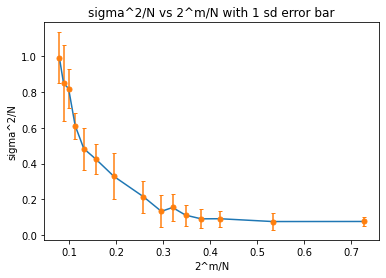

In [9]:
x = 2**m/N
y = variance/N
plt.plot(x, y)
plt.errorbar(x, y, yerr=sd/N, fmt='o', markersize=5, capsize=2)
plt.title('sigma^2/N vs 2^m/N with 1 sd error bar')
plt.xlabel('2^m/N')
plt.ylabel('sigma^2/N')
plt.show()